In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/messy_data.csv')

In [3]:
df.head()

,id,age,height,weight,income,purchases,gender
0,1,25.0,175.0,68,35000.0,"23,45,12",male
1,2,NaN,182.0,80,42000.0,"34,,19",female
2,3,150.0,165.0,180,28000.0,NaN,unknown
3,4,34.0,168.0,70,NaN,",55,67",male
4,5,29.0,190.0,165,31000.0,"12,19,23",female


In [ ]:
df.loc[(df['age'] < 0) | (df['age'] > 90), 'age'] = np.nan
df.loc[df['height'] <= 0, 'height'] = np.nan
df.loc[df['weight'] <= 0, 'weight'] = np.nan
df.loc[df['income'] <= 0, 'income'] = np.nan

In [5]:
df.head()

,id,age,height,weight,income,purchases,gender
0,1,25.0,175.0,68.0,35000.0,"23,45,12",male
1,2,NaN,182.0,80.0,42000.0,"34,,19",female
2,3,NaN,165.0,180.0,28000.0,NaN,unknown
3,4,34.0,168.0,70.0,NaN,",55,67",male
4,5,29.0,190.0,165.0,31000.0,"12,19,23",female


### Step : Handle Missing Values

In [6]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['height'].fillna(df['height'].mean(), inplace=True)
df['weight'].fillna(df['weight'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)

In [7]:
df.head()

,id,age,height,weight,income,purchases,gender
0,1,25.0,175.0,68.0,35000.000000,"23,45,12",male
1,2,35.0,182.0,80.0,42000.000000,"34,,19",female
2,3,35.0,165.0,180.0,28000.000000,NaN,unknown
3,4,34.0,168.0,70.0,36142.857143,",55,67",male
4,5,29.0,190.0,165.0,31000.000000,"12,19,23",female


### Step : Normalize relevant numerical columns (e.g., height, weight, income)

In [8]:
df['height'] = (df['height'] - df['height'].min()) / (df['height'].max() - df['height'].min())
df['weight'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())
df['income'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())

In [9]:
df.head()

,id,age,height,weight,income,purchases,gender
0,1,25.0,0.500000,0.000000,0.500000,"23,45,12",male
1,2,35.0,0.733333,0.098361,1.000000,"34,,19",female
2,3,35.0,0.166667,0.918033,0.000000,NaN,unknown
3,4,34.0,0.266667,0.016393,0.581633,",55,67",male
4,5,29.0,1.000000,0.795082,0.214286,"12,19,23",female


### One-hot-encoding

In [10]:
df = pd.get_dummies(df, columns=['gender'], dummy_na=True)

In [11]:
df.head()

,id,age,height,weight,income,purchases,gender_female,gender_male,gender_other,gender_unknown,gender_nan
0,1,25.0,0.500000,0.000000,0.500000,"23,45,12",False,True,False,False,False
1,2,35.0,0.733333,0.098361,1.000000,"34,,19",True,False,False,False,False
2,3,35.0,0.166667,0.918033,0.000000,NaN,False,False,False,True,False
3,4,34.0,0.266667,0.016393,0.581633,",55,67",False,True,False,False,False
4,5,29.0,1.000000,0.795082,0.214286,"12,19,23",True,False,False,False,False


### Convert the `purchases` column:

In [12]:
def clean_purchases(value):
    if pd.isna(value):
        return []
    items = value.split(',')
    cleaned = [int(x) if x.strip().isdigit() else 0 for x in items]
    return cleaned

In [13]:
df['purchases'] = df['purchases'].apply(clean_purchases)

In [14]:
df.head()

,id,age,height,weight,income,purchases,gender_female,gender_male,gender_other,gender_unknown,gender_nan
0,1,25.0,0.500000,0.000000,0.500000,"[23, 45, 12]",False,True,False,False,False
1,2,35.0,0.733333,0.098361,1.000000,"[34, 0, 19]",True,False,False,False,False
2,3,35.0,0.166667,0.918033,0.000000,[],False,False,False,True,False
3,4,34.0,0.266667,0.016393,0.581633,"[0, 55, 67]",False,True,False,False,False
4,5,29.0,1.000000,0.795082,0.214286,"[12, 19, 23]",True,False,False,False,False


### Save cleaned DataFrame

In [15]:
df.to_csv('cleaned_data.csv')

### Optional task - Creating plot

In [20]:
avg_income_by_age = df.groupby('age')['income'].mean().reset_index()

In [21]:
avg_income_by_age

,age,income
0,25.0,35000.0
1,29.0,31000.0
2,33.0,0.0
3,34.0,31625.0
4,38.0,39000.0
5,42.0,37000.0
6,44.0,41000.0
7,49.0,36812.5
8,90.0,28000.0


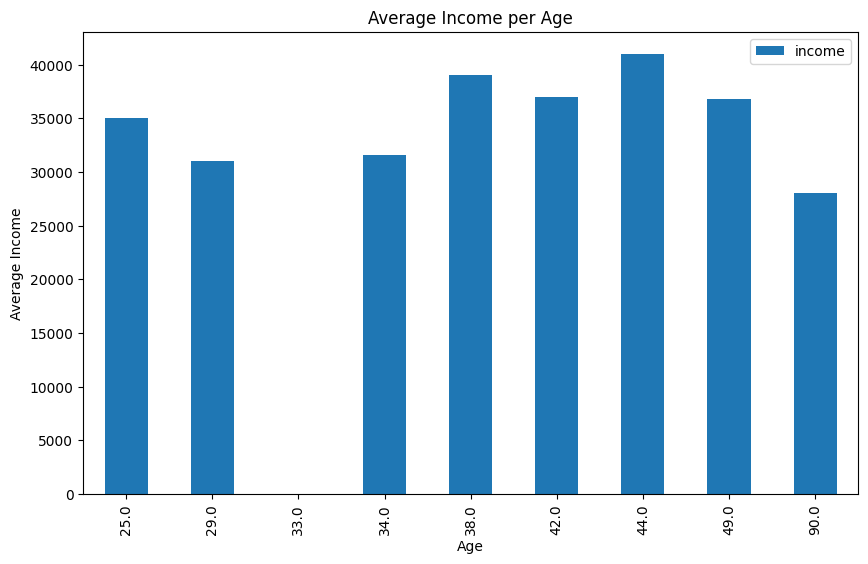

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

avg_income_by_age.plot(
    x='age',
    y='income',
    kind='bar',
    figsize=(10,6)
)
plt.title('Average Income per Age')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.show()